# Class 02
## Machine Learning Models: Linear regression & Validation

We are going to cover two main topics in this class: **Linear Regressions** and **Validation**. We need to start with a broader question, though.

## What is Machine Learning?

The goal this semester is to use machine learning to teach the computer how to make predictions. So we'll start with my definitions of machine learning -- in particular of supervised machine learning. We are using a programming algorithm that gives the computer the tools it needs to identify patterns in a set of data. Once we have those patterns, we can use them to make predictions - what we would expect should happen if we gather more data that may not necessarily be exactly the same as the data we learned from.

We'll start by looking at a very simple set of fake data that will help us cover the key ideas. Suppose that we just collected four data points. I've manually input them (as opposed to using a CSV file). Execute the following cell to see what the data look like.

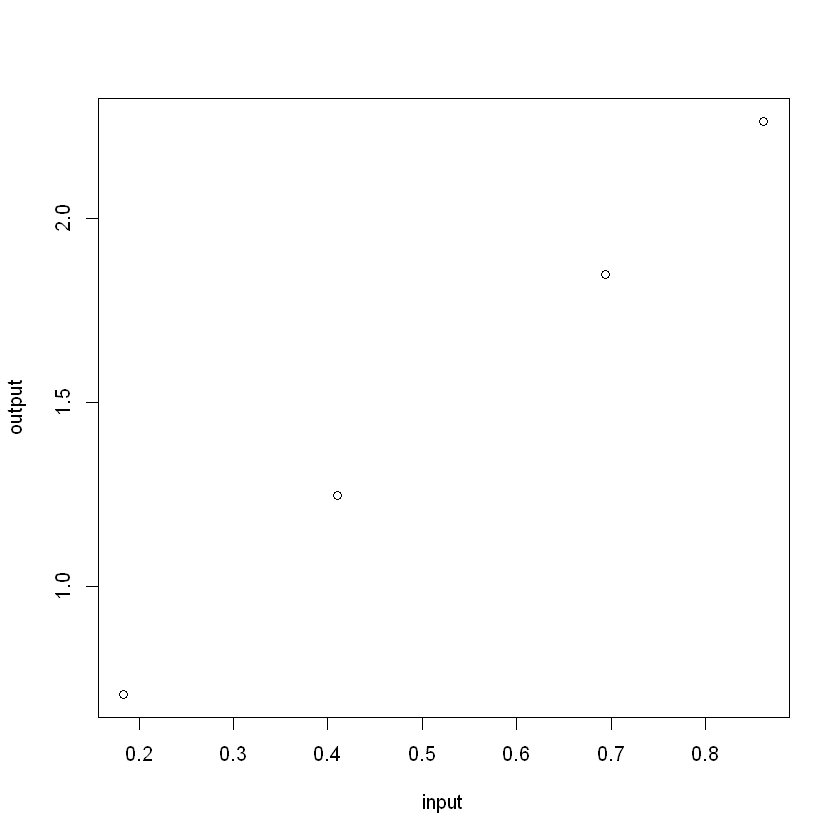

In [1]:
fakedata1 <- data.frame(input=c(0.862, 0.694, 0.184, 0.41), output= c(2.264, 1.847, 0.705,1.246 ))

plot(output~input,fakedata1)

It is pretty clear that there is a linear trend here. If I wanted to predict what would happen if we tried the input of `x=0.6`, it would be a good guess to pick something like `y=1.6` or so. Training the computer to do this is what we mean by _Machine Learning_. 

To formalize this a little bit, it consists of four steps:

1. We start with relevant historical data. This is our input to the machine learning algorithm.
2. Choose an algorithm. There are a number of possibilities that we will cover over the course of the semester.
3. Train the model. This is where the computer learns the pattern.
4. Test the model. We now have to check to see how well the model works.

We then refine the model and repeat the process until we are happy with the results.

### The Testing Problem

There is a bit of a sticky point here. If we use our data to train the computer, what do we use to test the model to see how good it is? If we use the same data to test the model we will, most likely, get fantastic results! After all, we used that data to train the model, so it should (if the model worked at all) do a great job of predicting the results.

However, this doesn't tell us anything about how well the model will work with a _**new**_ data point. Even if we get a new data point, we won't necessarily know what it is _supposed_ to be, so we won't know how well the model is working. There is a way around all of this that works reasonably well. What we will do is set aside a part of our historical data as "test" data. We won't use that data to train the model. Instead, we will use it to test the model to see how well it works. This gives us a good idea of how the model will work with new data points. As a rule of thumb, we want to reserve about 20% of our data set as testing data.

We will use a compound command to sample the data. It will provide a random sample of 80% of the rows and this is how it works:

* `sample()` takes a list of numbers corresponding to each row in the data frame as the first argument and how many to select as the second argument.
* `seq()` creates a sequence starting with zero and going to the number provided as the argument
* `nrow()` returns the number of rows in the dataframe.

This gives us a random sample of 80% of the rows in the data frame. We then index the data frame twice: once to give us the training rows, and a second time using `-trainIndex` to give us the other rows as the training rows.

Finally, we plot the train and test sets with different colors to see which points were selected.

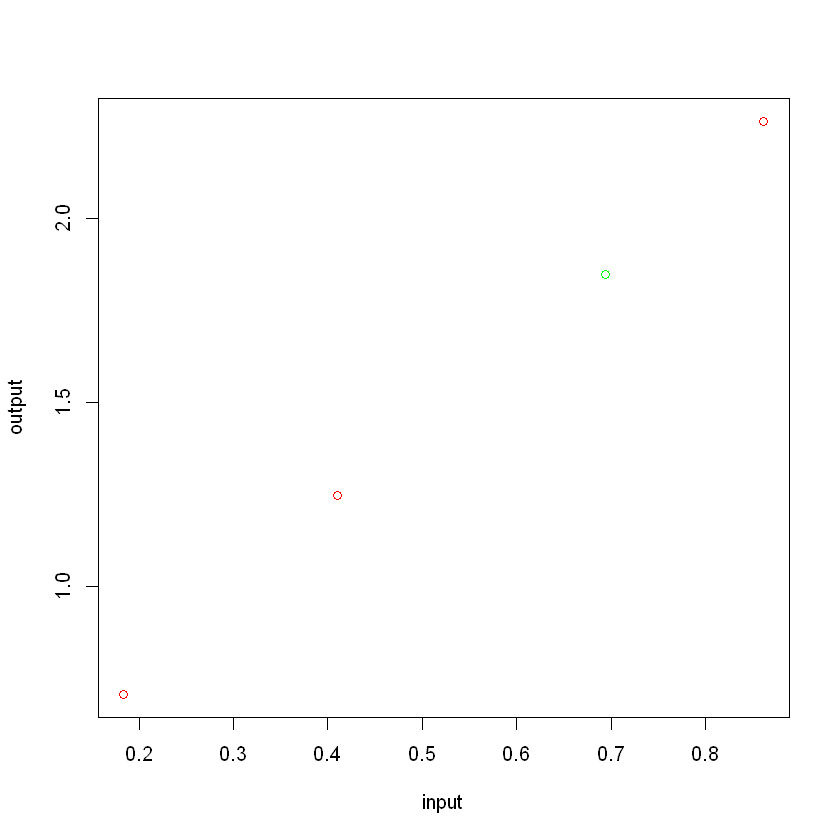

In [2]:
set.seed(23)

trainIndex <- sample(seq(nrow(fakedata1)), nrow(fakedata1)*0.8)

faketrain1 <- fakedata1[trainIndex, ]
faketest1 <- fakedata1[-trainIndex, ]

plot(faketrain1,col='red')
points(faketest1,col="green")


You can see that, with a 20% split, our small fake dataset doesn't have very many points. Really we shouldn't be working with less than 100 points for anything we do. Any fewer than that and the statistics just start breaking. Ideally we'd have tens of millions of data points. We'll talk later about how to get that much data, but we'll start small for now. We'll load in the `Class02_fakedata2.csv` file and split it 80/20 training/testing datasets.

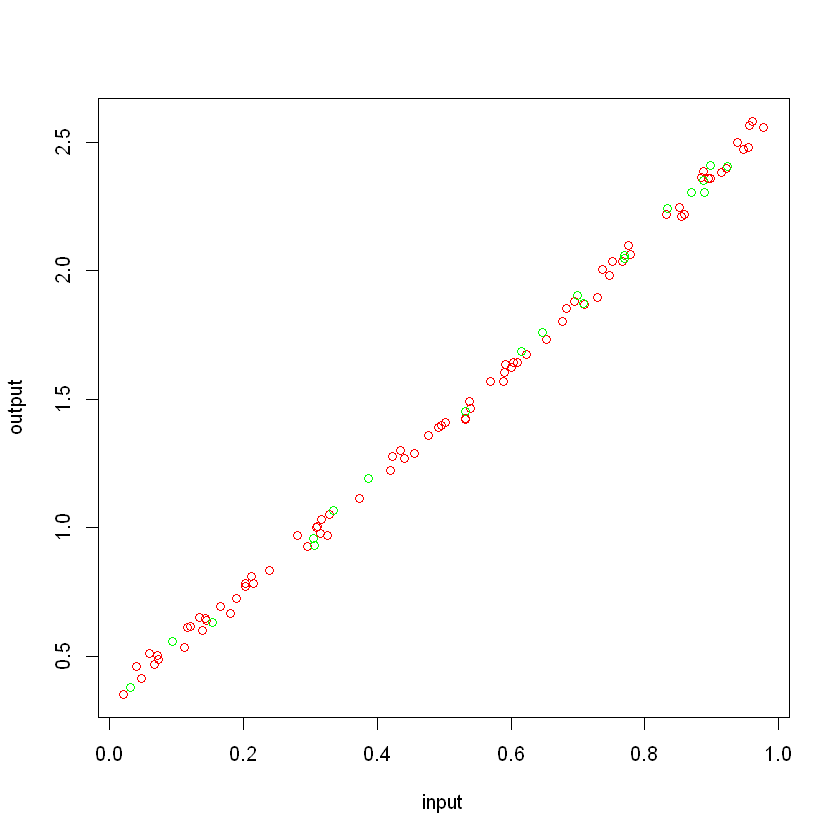

In [3]:
fakedata2 <- read.csv('Class02_fakedata2.csv')

trainIndex <- sample(seq(nrow(fakedata2)), nrow(fakedata2)*0.8)

faketrain2 <- fakedata2[trainIndex, ]
faketest2 <- fakedata2[-trainIndex, ]

plot(faketrain2,col='red')
points(faketest2,col="green")



# Linear Regression

We are now ready to train our linear model on the training part of this data. Remember that, from this point forward, we must "lock" the testing data and not use it to train our models. We do this using the `lm()` function in `R`. It takes a `formula` as the first argument: we've seen this before using the `plot()` function. It is the same form: `dependent ~ independent` variables.

Let's take a quick look at the data to make sure we know what we're looking for in terms of column names.

In [4]:
head(faketrain2)

,input,output
72,0.329,1.052
82,0.492,1.392
42,0.531,1.422
94,0.677,1.801
97,0.539,1.463
80,0.682,1.854


We now make the linear model. We also look at the model output using the `summary()` command. This gives us the intercept and the slope of the `input` column line under the `Estimate` heading.

In [5]:
linearmodel <- lm(output ~ input, faketrain2)
summary(linearmodel)


Call:
lm(formula = output ~ input, data = faketrain2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.083326 -0.029887  0.001852  0.024274  0.098175 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.296993   0.008756   33.92   <2e-16 ***
input       2.275580   0.015114  150.57   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03946 on 78 degrees of freedom
Multiple R-squared:  0.9966,	Adjusted R-squared:  0.9965 
F-statistic: 2.267e+04 on 1 and 78 DF,  p-value: < 2.2e-16


That doesn't really tell us much. It would be better if we could compare the model to the test data. We will use the inputs from the test data and run them through the model. It will predict what the outputs should be. We can then compare them to the actual outputs. We'll plot the predictions as a line (since they will all lie on the same line due to our model being a linear regression).

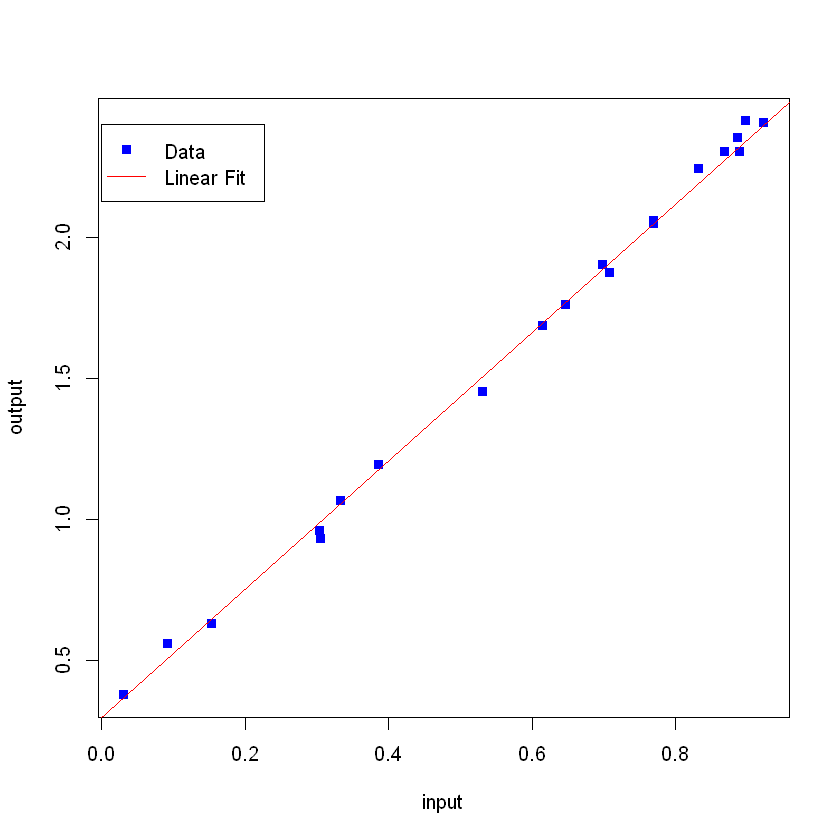

In [6]:
plot(faketest2, pch=15, col="blue")
abline(linearmodel,col="red")

# Add a legend
legend(0,2.4, # places a legend at the appropriate place
       c("Data","Linear Fit"), # puts text in the legend
       lty=c(0,1), # gives the legend appropriate symbols (lines)
       pch=c(15,NA), # Sets the symbol correctly for the point and line
       col=c("blue","red")) # gives the legend lines the correct color and width

Now we can make actual predictions on the `faketest2` data using the `predict()` function. It takes the model and the test data (in the same format as the training data) and returns its predictions for the `y` values given the `x` values. We plot the residuals (`predictions - actuals`) which should be randomly scattered around zero.

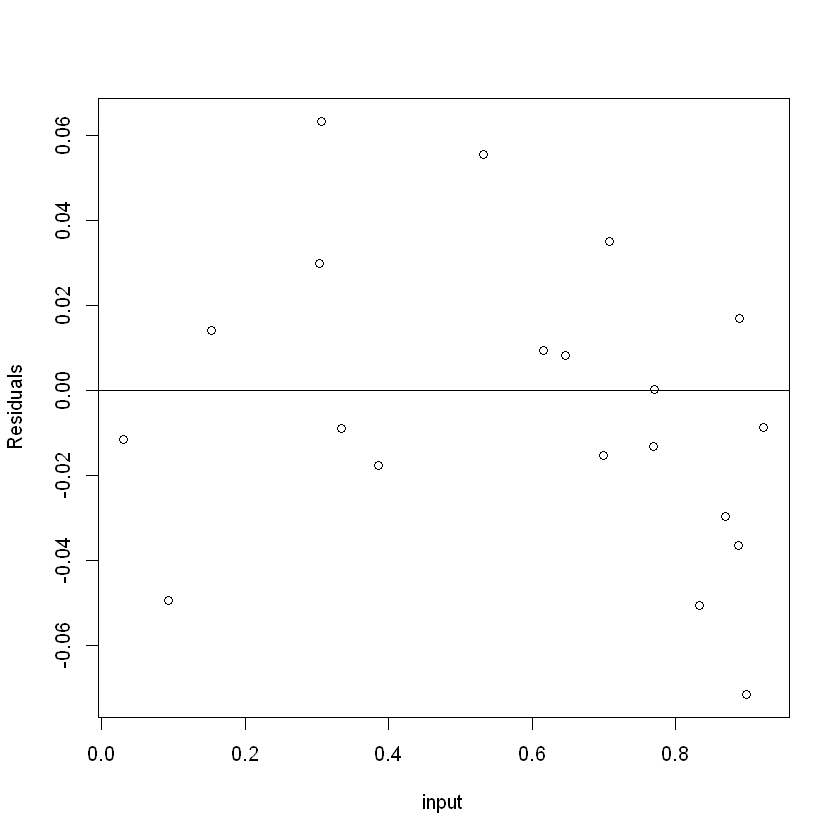

In [7]:
predictions <- predict(linearmodel, faketest2)
actuals <- faketest2$output
plot(faketest2$input, (predictions - actuals), ylab="Residuals", xlab="input") 
abline(0, 0) # the zero line for reference

This looks pretty good. We can go one step futher and define a quantitative measure of the quality of the fit. We will subtract the difference between the prediction and the actual value for each point. We then square all of those and average them.  Finally we take the square root of all of that. This is known as the RMS error (for Root Mean Squared).

In [8]:
print(paste("RMS Error:", sqrt(mean((predictions-actuals)^2))))

[1] "RMS Error: 0.0340454453405506"


# Using Multiple Inputs

We'll now move to a real-world data set (which means it is messy). We'll load in the diabetes data set from Class 01 and try training it. Our input will be the 'BMI' feature and the output is the 'Target' column.


In [9]:
diabetes <- read.csv('../Class01/Class01_diabetes_data.csv')
head(diabetes)

Age,Sex,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,Target
0.038075906,0.05068012,0.06169621,0.021872355,-0.044223498,-0.03482076,-0.043400846,-0.002592262,0.019908421,NA,151
-0.001882017,-0.04464164,-0.05147406,-0.026327835,-0.008448724,-0.01916334,0.074411564,-0.039493383,-0.068329744,-0.092204050,75
0.085298906,0.05068012,0.04445121,-0.005670611,-0.045599451,-0.03419447,-0.032355932,-0.002592262,0.002863771,-0.025930339,141
-0.089062939,-0.04464164,-0.01159501,-0.036656447,0.012190569,0.02499059,-0.036037570,0.034308859,0.022692023,-0.009361911,206
0.005383060,-0.04464164,-0.03638469,0.021872355,0.003934852,0.01559614,0.008142084,-0.002592262,-0.031991445,-0.046640874,135
-0.092695478,-0.04464164,-0.04069594,-0.019442093,-0.068990650,-0.07928784,0.041276824,-0.076394504,-0.041180385,-0.096346157,97


I've put all the steps together in one cell and commented on each step.

[1] "RMS Error: 58.1900924435969"


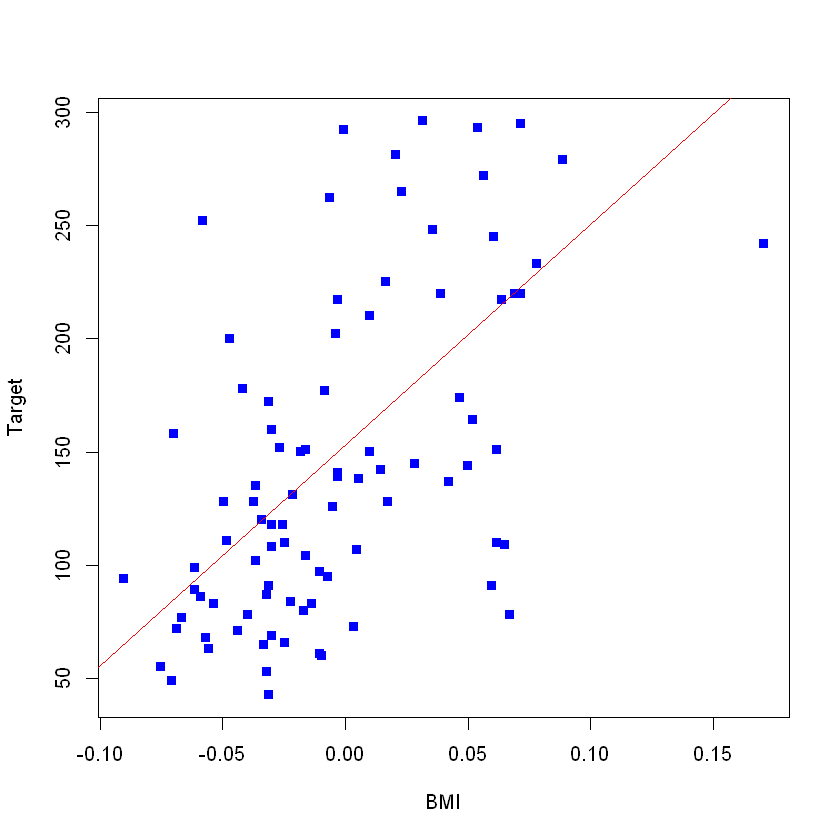

In [10]:
# Step 1: Split off the test data
trainIndex <- sample(seq(nrow(diabetes)), nrow(diabetes)*0.8)

dia_train <- diabetes[trainIndex, ]
dia_test <- diabetes[-trainIndex, ]

# Step 2: Fit the model
dia_model <- lm(Target~BMI, dia_train)

# Step 3: Get the predictions
predictions <- predict(dia_model,dia_test)
actuals <- dia_test$Target

# Step 4: Plot the results
plot(dia_test$BMI,dia_test$Target, pch=15, col="blue", xlab="BMI",  ylab="Target")
abline(dia_model,col="red")

# Add a legend
legend(0,2.4, # places a legend at the appropriate place
       c("Data","Linear Fit"), # puts text in the legend
       lty=c(0,1), # gives the legend appropriate symbols (lines)
       pch=c(15,NA), # Sets the symbol correctly for the point and line
       col=c("blue","red")) # gives the legend lines the correct color and width

# Step 7: Get the RMS value
print(paste("RMS Error:",sqrt(mean((predictions-actuals)^2))))

Not too surprising that the RMS error isn't very good. This is the real world after all. However, we saw in Class 01 that there may be some dependence on some of the other variables like the LDL. We can try a linear regression with both of them as inputs. I have to change the code a little to do this. Compare this with the previous cell to see what needs to change.

In order to make the linear model easier to change, we will create the formula first using a couple of extra tools:

1. `paste(... collapse='+')` This will put all of our columns into a string separated by "+" signs
2. `as.formula()` This converts our string of instructions into an `R`-style formula for use by the `lm()` function


[1] "RMS Error: 58.5649185697744"


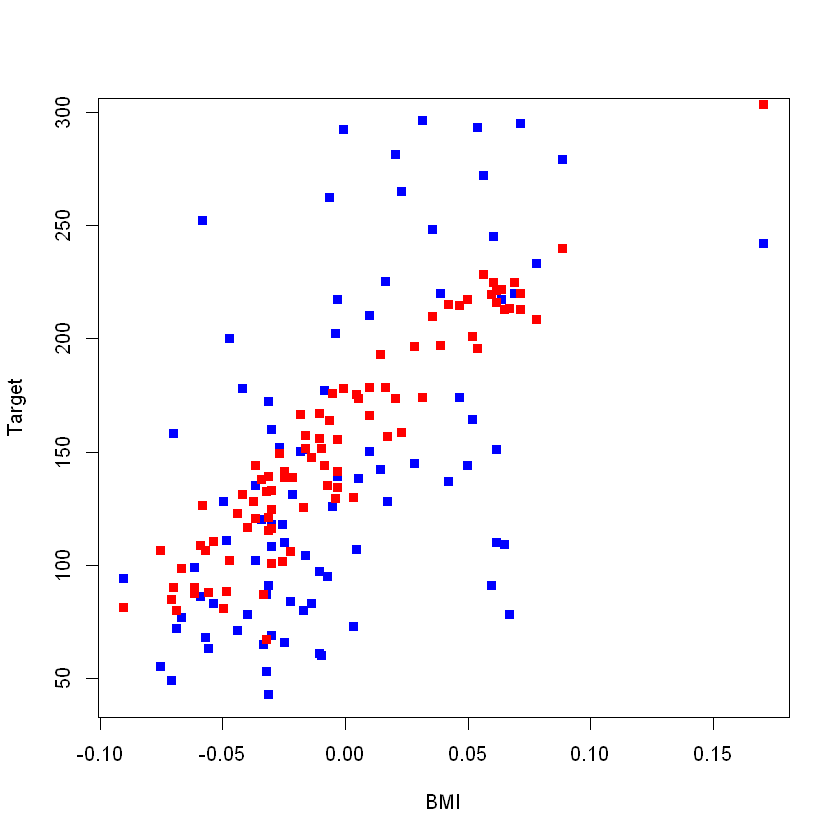

In [11]:
# Step 2: Create linear regression object
inputcolumns <- c('BMI', 'HDL')
lmformula <- as.formula(paste('Target ~',paste(inputcolumns, collapse='+')))

# Step 2: Fit the model
dia_model2 <- lm(lmformula, dia_train)

# Step 3: Get the predictions
predictions <- predict(dia_model2,dia_test)
actuals <- dia_test$Target

# Step 4: Plot the results
plot(dia_test$BMI,actuals, pch=15, col="blue", xlab="BMI",  ylab="Target")

points(dia_test$BMI,predictions, pch=15, col="red", xlab="BMI",  ylab="Target")

# Add a legend
legend(0,2.4, # places a legend at the appropriate place
       c("Actuals","Predictions"), # puts text in the legend
       pch=c(15,15), # Sets the symbol correctly for the point and line
       col=c("blue","red")) # gives the legend lines the correct color and width

# Step 7: Get the RMS value
print(paste("RMS Error:",sqrt(mean((predictions-actuals)^2))))

## In-class Activity

Try adding columns to the inputcolumns variable and see how that changes the RMS error. Some of the columns reduce the error significantly. If we use all of them, we reduce our RMS error by about 15%.

# Assignment

Your assignment is to try a linear regression on your own data set. Try adjusting the number of features you use to see if it improves your fit.